In [1]:
import pandas as pd

df = pd.DataFrame()

data_list = []
with open('../log/wikipedia.difficulty.log', 'r') as f:
    lines = f.readlines()
    data_dict = {}
    for line in lines:
        if line.startswith('hnsw_time'):
            data_dict['hnsw_time'] = float(line.split(' ')[1])
        elif line.startswith('gpu_time'):
            data_dict['gpu_time'] = float(line.split(' ')[1])
        elif line.startswith('[Query][HNSW]'):
            data_dict['NDC'] = float(line.split(' ')[-1])
        elif line.startswith('[Query][ANNS]'):
            data_dict['recall_ANNS'] = float(line.split(' ')[-1])
        elif line.startswith('[Query][GPU]'):
            data_dict['recall_GPU'] = float(line.split(' ')[-1])
            data_list.append(data_dict)
            data_dict = {}
df = pd.DataFrame(data_list)

print(df[['NDC', 'recall_ANNS', 'recall_GPU', 'hnsw_time', 'gpu_time']])

       NDC  recall_ANNS  recall_GPU  hnsw_time  gpu_time
0  48216.9     0.850274    0.999992    57.7925   70.3448
1  44386.9     0.908152    0.999992    48.6629   70.7116
2  41926.8     0.932664    0.999992    43.8906   70.7166
3  39802.6     0.948689    0.999993    40.4227   70.6215
4  37795.9     0.960297    0.999993    38.5423   70.6870
5  35776.4     0.969053    0.999993    36.5995   70.7374
6  33590.9     0.976270    0.999993    34.0437   70.7301
7  30921.5     0.982763    0.999994    30.9131   70.9403
8  27117.6     0.989008    0.999995    27.2865   70.9409
9  19036.2     0.994332    0.999994    19.3342   71.2132


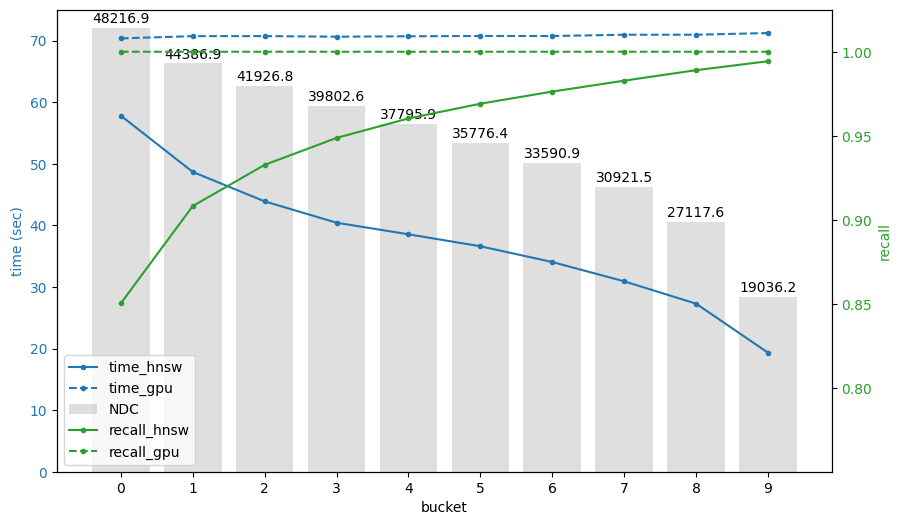

In [15]:
#        NDC  recall_ANNS  recall_GPU  hnsw_time  gpu_time
# 0  48216.9     0.850274    0.999992    57.7925   70.3448
# 1  44386.9     0.908152    0.999992    48.6629   70.7116
# 2  41926.8     0.932664    0.999992    43.8906   70.7166
# 3  39802.6     0.948689    0.999993    40.4227   70.6215
# 4  37795.9     0.960297    0.999993    38.5423   70.6870
# 5  35776.4     0.969053    0.999993    36.5995   70.7374
# 6  33590.9     0.976270    0.999993    34.0437   70.7301
# 7  30921.5     0.982763    0.999994    30.9131   70.9403
# 8  27117.6     0.989008    0.999995    27.2865   70.9409
# 9  19036.2     0.994332    0.999994    19.3342   71.2132
# reverse df
import matplotlib.pyplot as plt
import pandas as pd

df = df.iloc[::-1]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df.index, df['hnsw_time'], '.-', label='time_hnsw', color='tab:blue')
ax1.plot(df.index, df['gpu_time'], '.--', label='time_gpu', color='tab:blue')
ax1.set_ylabel('time (sec)', color='tab:blue')
ax1.set_ylim([0, 75])
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.plot(df.index, df['recall_ANNS'], '.-', label='recall_hnsw', color='tab:green')
ax2.plot(df.index, df['recall_GPU'], '.--', label='recall_gpu', color='tab:green')
ax2.set_ylabel('recall', color='tab:green')
ax2.set_ylim([0.75, 1.025])
ax2.set_yticks([0.8, 0.85, 0.9, 0.95, 1.0])
ax2.tick_params(axis='y', labelcolor='tab:green')

bars = ax1.bar(x=df.index, height=df['NDC'] / df['NDC'].max() * 72, label='NDC', alpha=0.25, color='gray')
for idx, bar in enumerate(bars):
    height = bar.get_height()
    ax1.annotate('{}'.format(df['NDC'].iloc[idx]),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1.5),
                 textcoords="offset points",
                 ha='center', va='bottom')

ax1.set_xlabel('bucket')
ax1.set_xticks(df.index)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.savefig('difficulty.pdf', bbox_inches='tight',  dpi=500)
plt.show()